In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('trainM.csv')
test = pd.read_csv('testM.csv')

In [3]:
train = train.rename(columns={'Unnamed: 0': 'date_forecast'})

In [4]:
train.set_index('date_forecast', inplace=True)
test.set_index('date_forecast', inplace=True)
train.index = pd.to_datetime(train.index)
train['is_est'] = 0
train['is_est'].iloc[-4418:] = 1

C:\Users\claxl\AppData\Local\Temp\ipykernel_81196\3508116958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['is_est'].iloc[-4418:] = 1


In [5]:
import re
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [6]:
nan_col = ['snow_densitykgm3','ceiling_height_aglm','cloud_base_aglm']
for col in nan_col:
    
    test[col] = test[col].fillna(0)
    train[col] = train[col].fillna(train[col].median())

train=train.dropna()
test=test.dropna()

In [7]:
train.isna().sum()

absolute_humidity_2mgm3          0
air_density_2mkgm3               0
ceiling_height_aglm              0
clear_sky_energy_1hJ             0
clear_sky_radW                   0
cloud_base_aglm                  0
dew_or_rimeidx                   0
dew_point_2mK                    0
diffuse_radW                     0
diffuse_rad_1hJ                  0
direct_radW                      0
direct_rad_1hJ                   0
effective_cloud_coverp           0
elevationm                       0
fresh_snow_12hcm                 0
fresh_snow_1hcm                  0
fresh_snow_24hcm                 0
fresh_snow_3hcm                  0
fresh_snow_6hcm                  0
is_dayidx                        0
is_in_shadowidx                  0
msl_pressurehPa                  0
precip_5minmm                    0
precip_type_5minidx              0
pressure_100mhPa                 0
pressure_50mhPa                  0
prob_rimep                       0
rain_waterkgm2                   0
relative_humidity_10

In [8]:
train.columns

Index(['absolute_humidity_2mgm3', 'air_density_2mkgm3', 'ceiling_height_aglm',
       'clear_sky_energy_1hJ', 'clear_sky_radW', 'cloud_base_aglm',
       'dew_or_rimeidx', 'dew_point_2mK', 'diffuse_radW', 'diffuse_rad_1hJ',
       'direct_radW', 'direct_rad_1hJ', 'effective_cloud_coverp', 'elevationm',
       'fresh_snow_12hcm', 'fresh_snow_1hcm', 'fresh_snow_24hcm',
       'fresh_snow_3hcm', 'fresh_snow_6hcm', 'is_dayidx', 'is_in_shadowidx',
       'msl_pressurehPa', 'precip_5minmm', 'precip_type_5minidx',
       'pressure_100mhPa', 'pressure_50mhPa', 'prob_rimep', 'rain_waterkgm2',
       'relative_humidity_1000hPap', 'sfc_pressurehPa', 'snow_densitykgm3',
       'snow_depthcm', 'snow_driftidx', 'snow_melt_10minmm', 'snow_waterkgm2',
       'sun_azimuthd', 'sun_elevationd', 'super_cooled_liquid_waterkgm2',
       't_1000hPaK', 'total_cloud_coverp', 'visibilitym', 'wind_speed_10mms',
       'wind_speed_u_10mms', 'wind_speed_v_10mms', 'wind_speed_w_1000hPams',
       'minute', 'hour', 

In [9]:
train.shape, test.shape

((26071, 50), (720, 48))

In [10]:
import pandas as pd

# Esempio di un DataFrame con una colonna rappresentante una curva
data = {'Tempo': [1, 2, 3, 4, 5, 6, 7, 8],
        'Curva': [1, 2, 2, 2, 3, 3, 2, 2]}

df = train

# Sostituisci 'colonna_curva' con il nome della colonna che rappresenta la curva
nome_colonna_curva = 'pv_measurement'

# Calcola la differenza tra i valori adiacenti
df['Differenza'] = df[nome_colonna_curva].diff()

# Filtra le righe in cui la differenza è diversa da zero
df_senza_stazionari = df[df['Differenza'] != 0]

# Ora df_senza_stazionari conterrà solo le righe in cui la curva non è stazionaria
# Puoi rimuovere la colonna 'Differenza' se non è più necessaria
df_senza_stazionari = df_senza_stazionari.drop(columns=['Differenza'])

df_senza_stazionari['pv_measurement'] = df_senza_stazionari['pv_measurement'].dropna()
df_senza_stazionari

,absolute_humidity_2mgm3,air_density_2mkgm3,ceiling_height_aglm,clear_sky_energy_1hJ,clear_sky_radW,cloud_base_aglm,dew_or_rimeidx,dew_point_2mK,diffuse_radW,diffuse_rad_1hJ,...,visibilitym,wind_speed_10mms,wind_speed_u_10mms,wind_speed_v_10mms,wind_speed_w_1000hPams,minute,hour,month,pv_measurement,is_est
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-09-04 08:00:00,6.65,1.2210,2286.800049,1.323078e+06,422.000000,2286.800049,0.0,278.199997,67.700001,232110.250000,...,49550.099609,1.25,-0.85,0.90,-0.0,22.5,8.0,9.0,137.20,0
2019-09-04 09:00:00,6.25,1.2140,2679.099976,1.685082e+06,509.149994,2679.099976,0.0,277.449997,74.599998,256233.796875,...,52311.599609,1.50,-1.50,-0.20,-0.0,22.5,9.0,9.0,0.00,0
2019-09-05 13:00:00,8.35,1.2265,983.800018,1.880102e+06,489.149994,983.800018,0.0,281.349991,76.799999,242689.351562,...,2659.200073,5.40,5.40,-0.30,0.0,22.5,13.0,9.0,98.00,0
2019-09-05 14:00:00,8.20,1.2255,1195.350037,1.603192e+06,396.800003,1195.350037,0.0,281.050003,93.949997,308822.796875,...,4205.899902,5.40,5.40,0.35,0.0,22.5,14.0,9.0,117.60,0
2019-09-05 15:00:00,8.00,1.2260,1308.600037,1.225626e+06,281.199997,1308.600037,0.0,280.750000,84.850002,323340.046875,...,4329.650146,5.30,5.30,0.30,0.0,22.5,15.0,9.0,166.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 17:00:00,4.45,1.2695,2030.000061,7.912231e+05,155.549995,620.350006,0.0,272.150009,74.649998,359468.187500,...,21536.350586,5.00,4.90,1.05,-0.0,22.5,17.0,4.0,190.12,1
2023-04-30 18:00:00,4.50,1.2730,1943.750000,3.582736e+05,50.700001,568.100006,0.0,272.250000,26.450000,182058.648438,...,22931.349609,4.45,4.15,1.65,-0.0,22.5,18.0,4.0,175.42,1
2023-04-30 19:00:00,4.40,1.2755,1456.549988,7.674555e+04,1.650000,551.199982,0.0,272.000000,1.150000,49763.550781,...,25033.099609,4.10,3.60,1.90,-0.0,22.5,19.0,4.0,50.96,1


In [11]:
df_senza_stazionari['pv_measurement'].dropna()

date_forecast
2019-09-04 08:00:00    137.20
2019-09-04 09:00:00      0.00
2019-09-05 13:00:00     98.00
2019-09-05 14:00:00    117.60
2019-09-05 15:00:00    166.60
                        ...  
2023-04-30 17:00:00    190.12
2023-04-30 18:00:00    175.42
2023-04-30 19:00:00     50.96
2023-04-30 20:00:00      2.94
2023-04-30 21:00:00      0.00
Name: pv_measurement, Length: 10592, dtype: float64

<Axes: xlabel='date_forecast'>

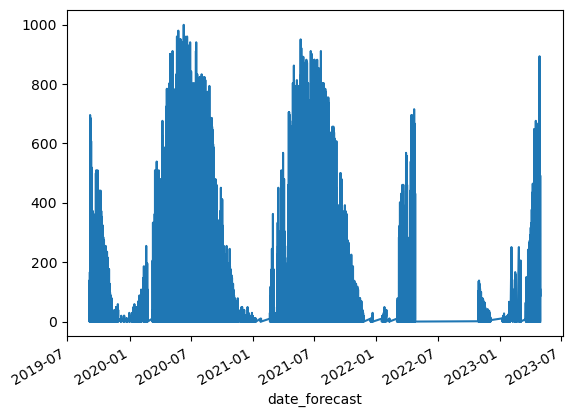

In [12]:
df_senza_stazionari['pv_measurement'].plot()

In [13]:
df_senza_stazionari = df_senza_stazionari.reset_index()

In [14]:
train = df_senza_stazionari

In [15]:
train['pv_measurement'] = train['pv_measurement'].mask(train['is_in_shadowidx'] == 1, 0)


<Axes: >

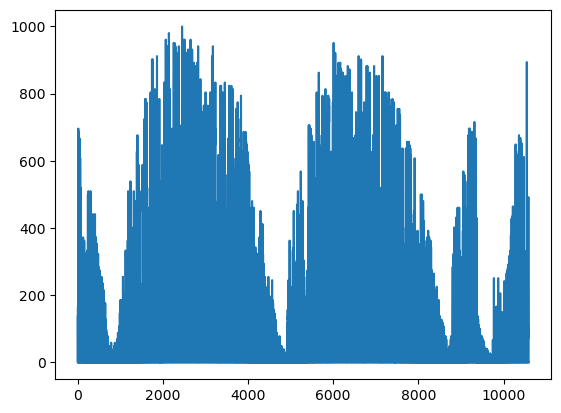

In [16]:
train['pv_measurement'].plot()

In [17]:
train.set_index('date_forecast', inplace=True)
train.index = pd.to_datetime(train.index)

In [18]:
train  = train.drop(columns = 'index')

KeyError: "['index'] not found in axis"

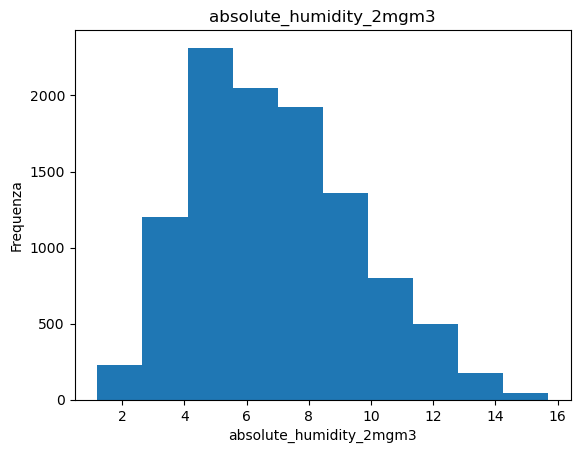

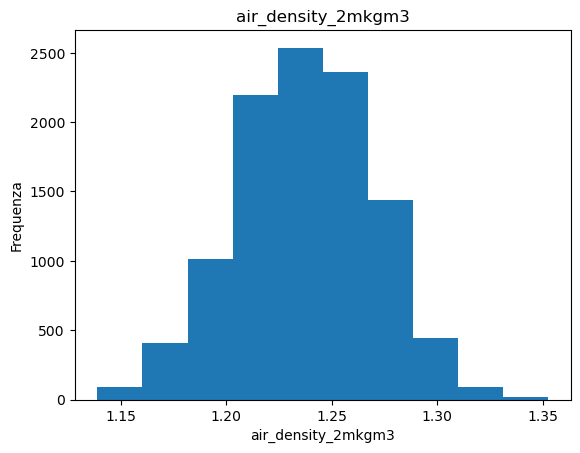

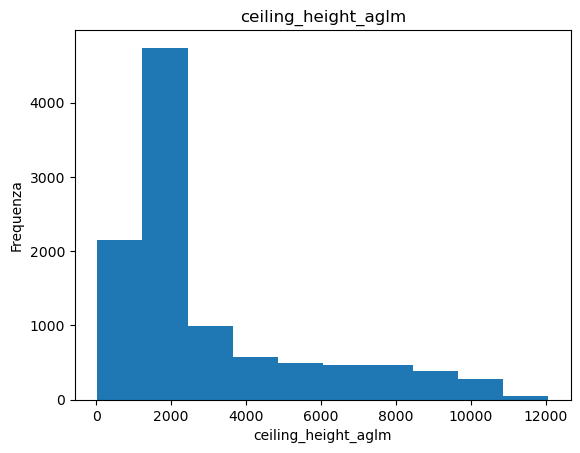

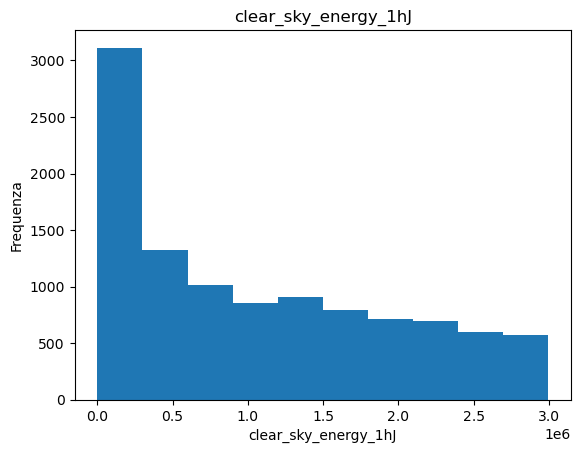

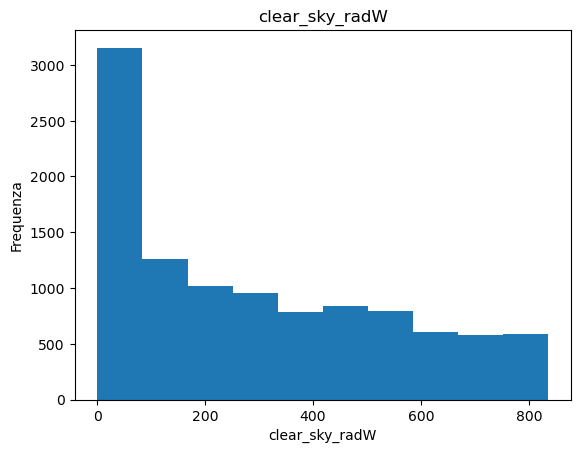

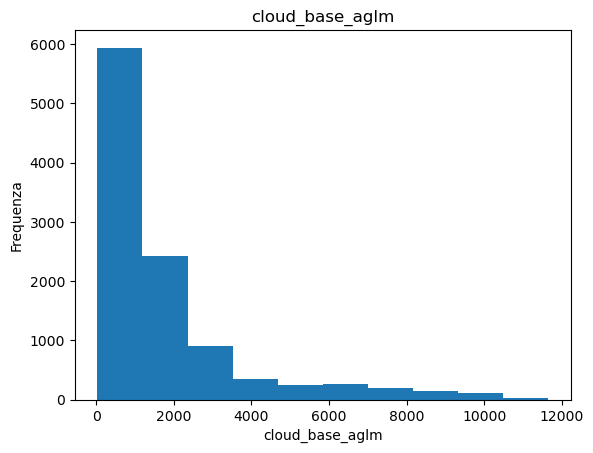

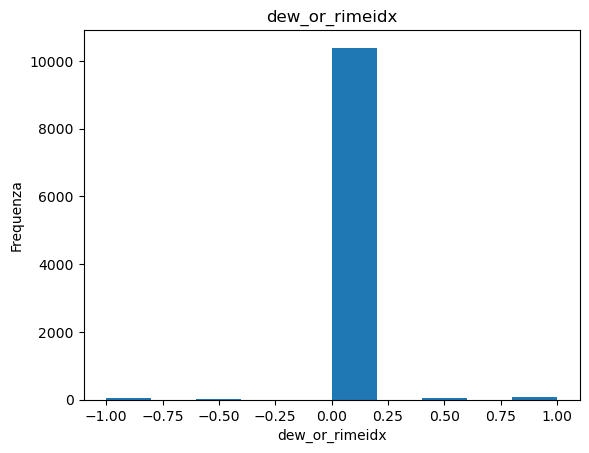

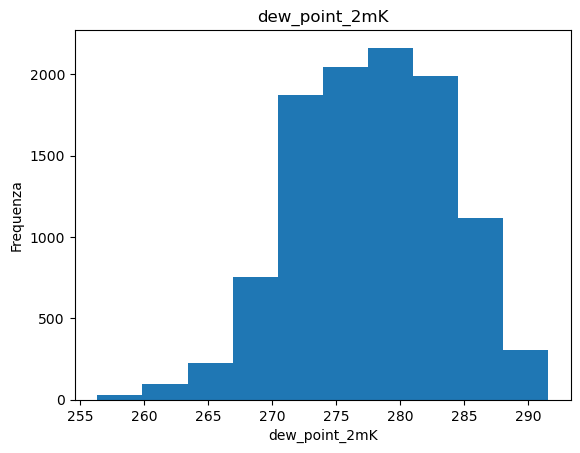

KeyboardInterrupt: 

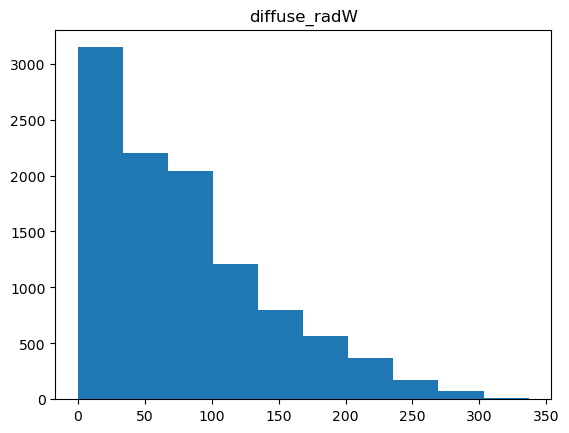

In [21]:
for column in train.columns:
    plt.figure()
    train[column].plot(kind='hist', bins=10, title=column)
    plt.xlabel(column)
    plt.ylabel('Frequenza')
    plt.show()

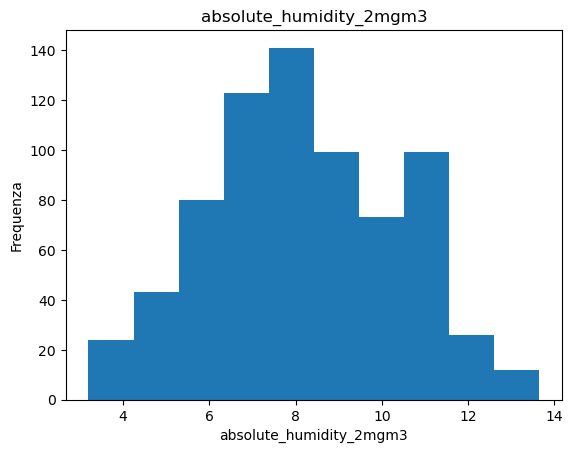

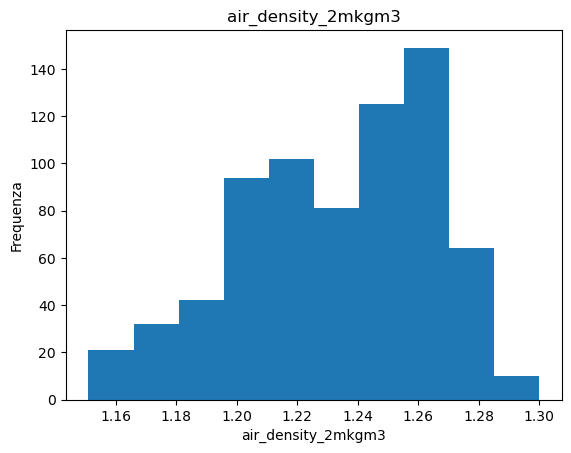

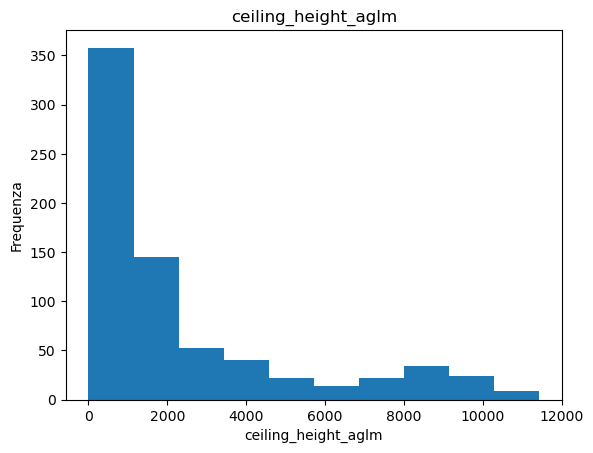

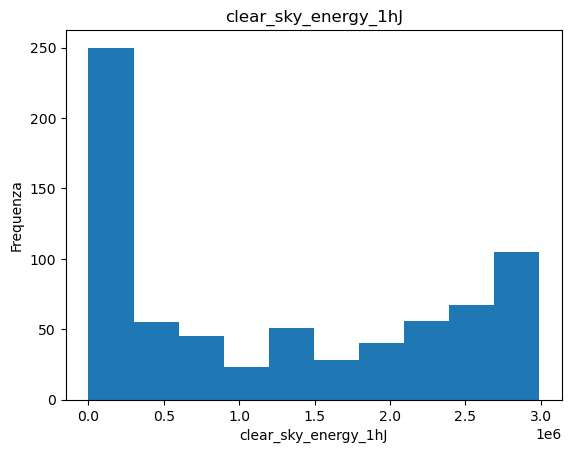

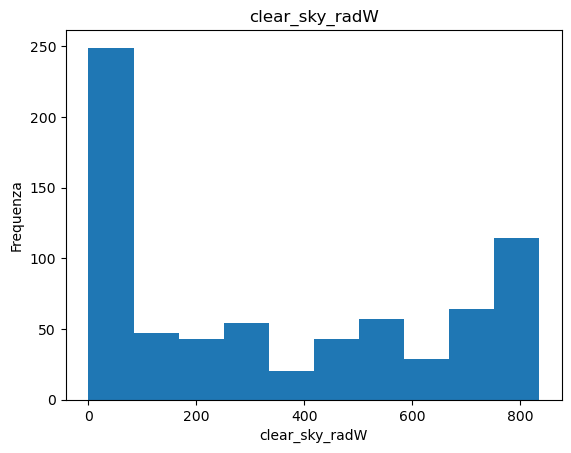

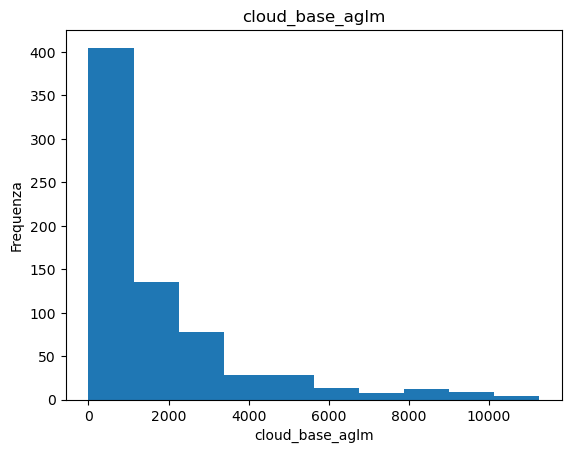

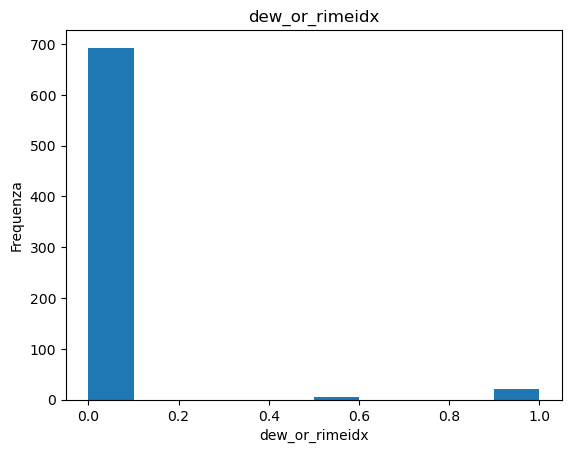

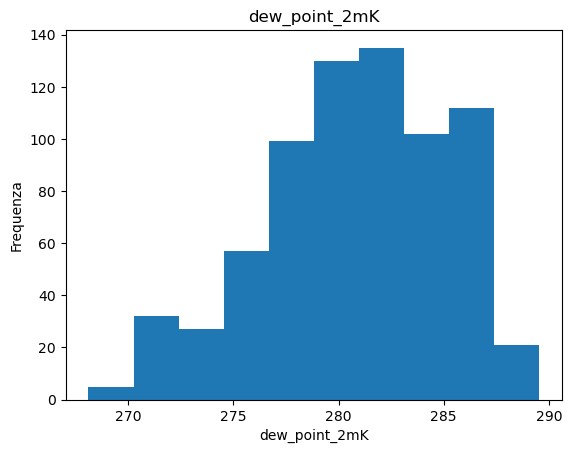

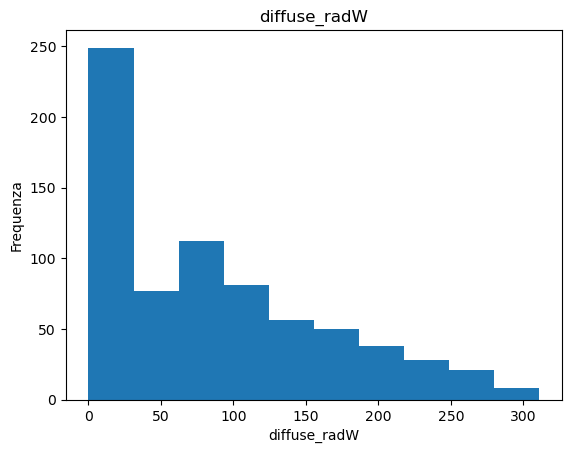

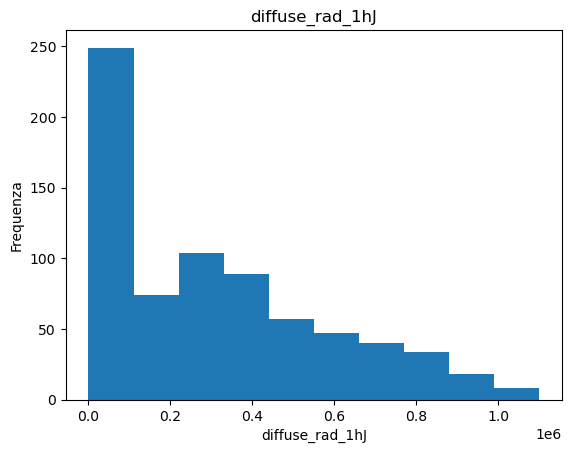

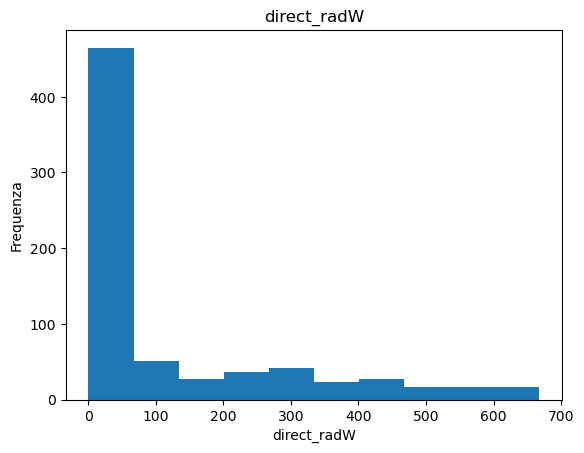

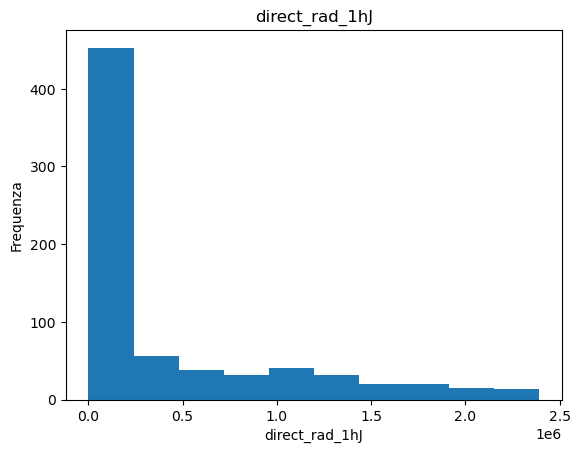

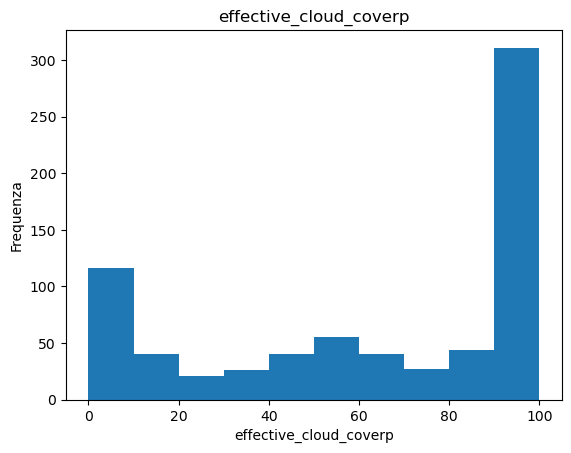

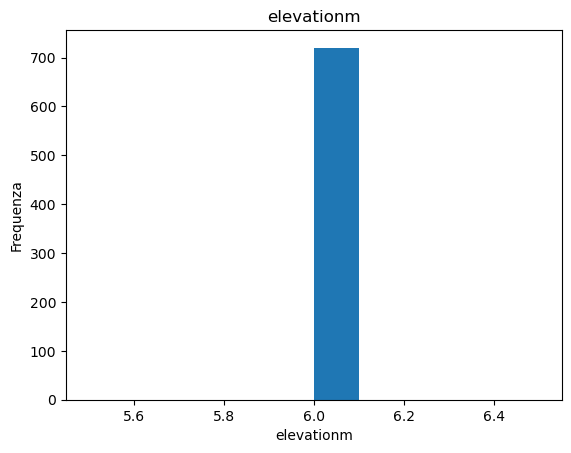

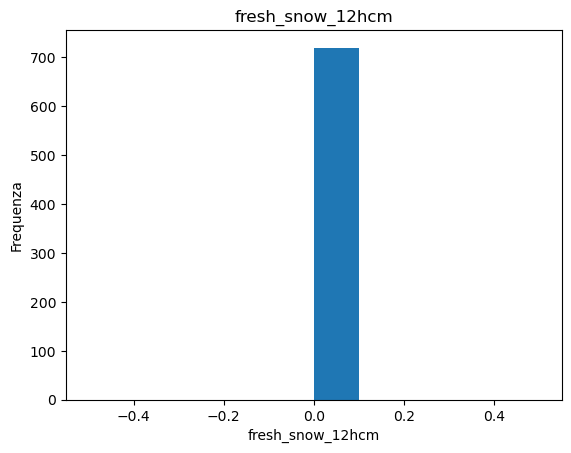

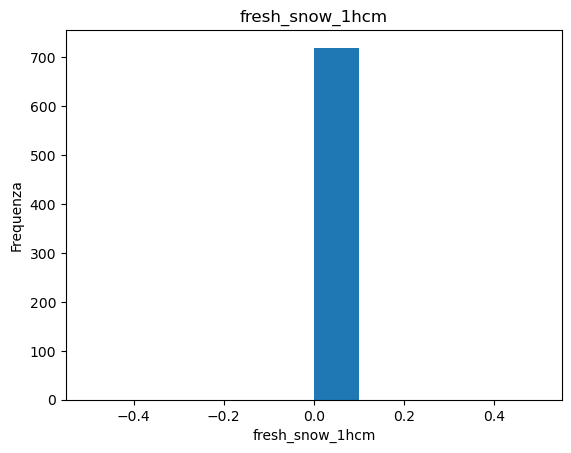

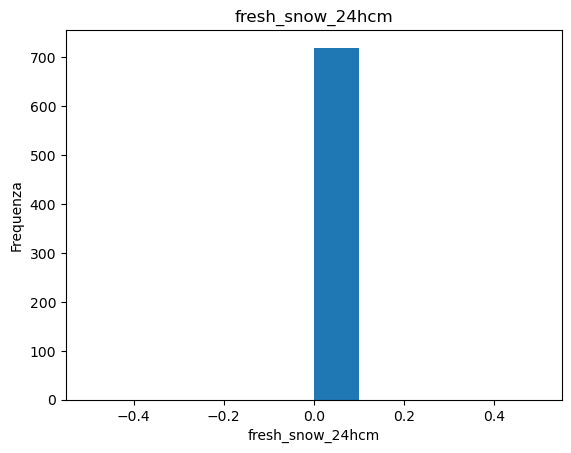

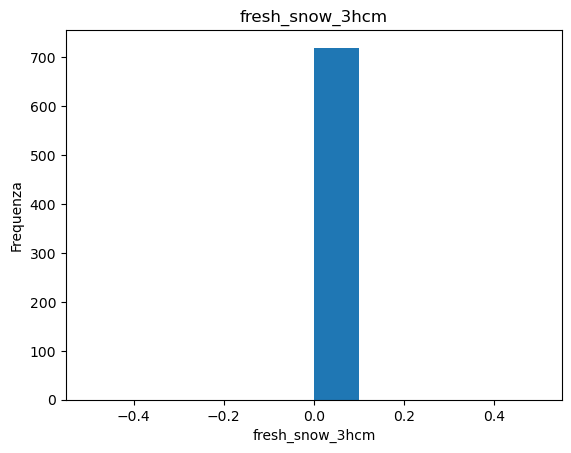

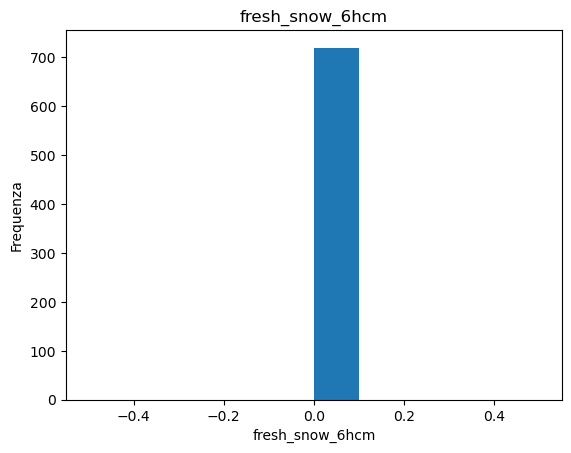

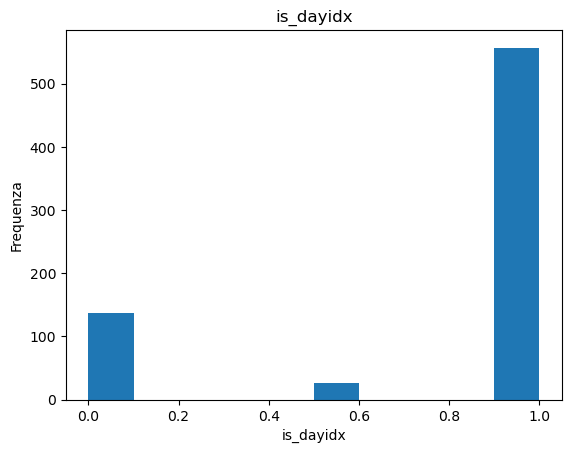

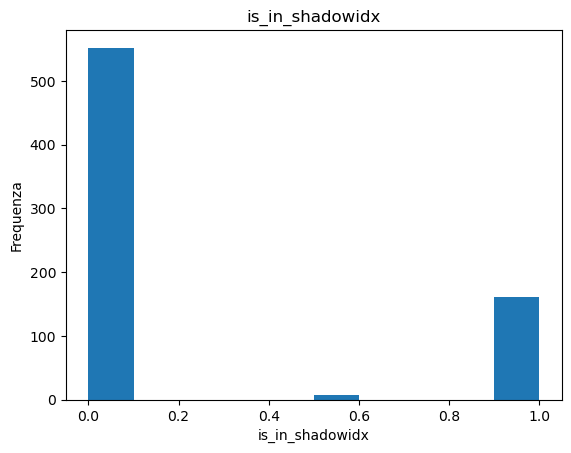

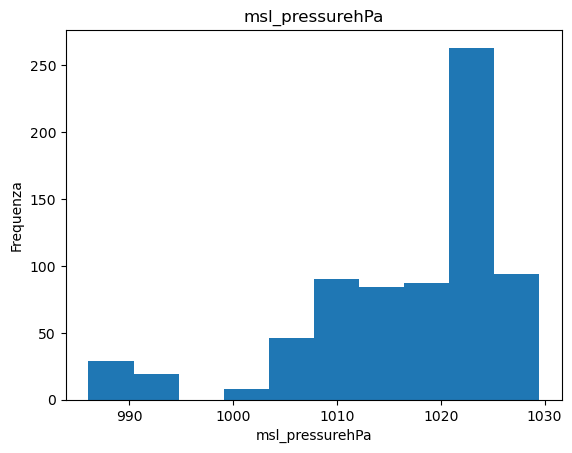

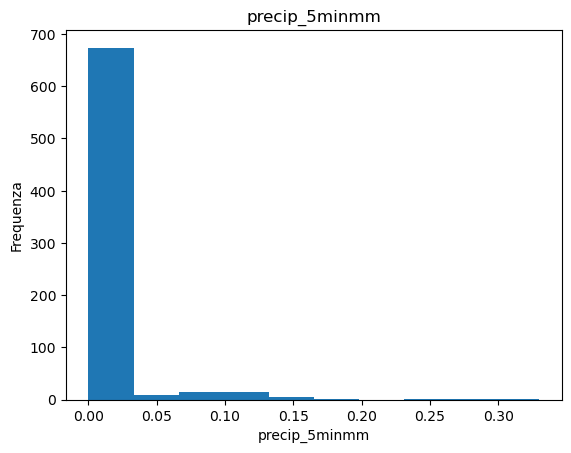

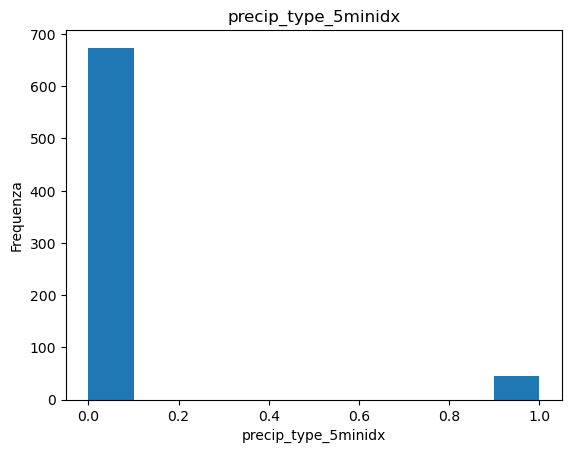

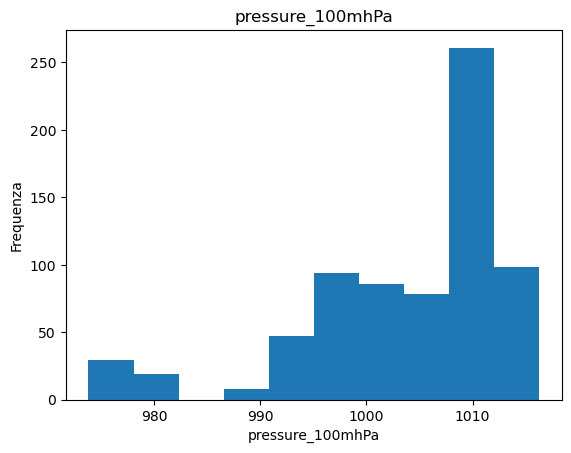

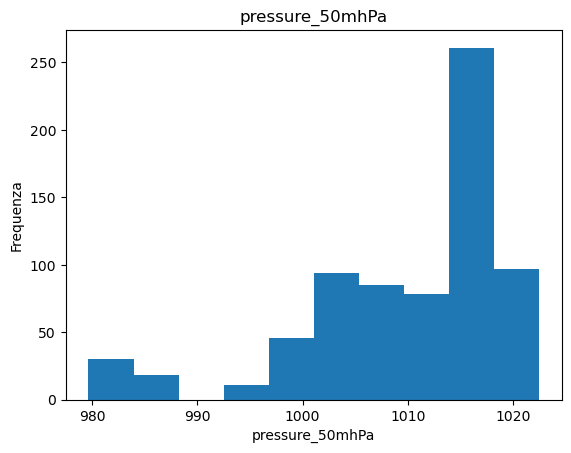

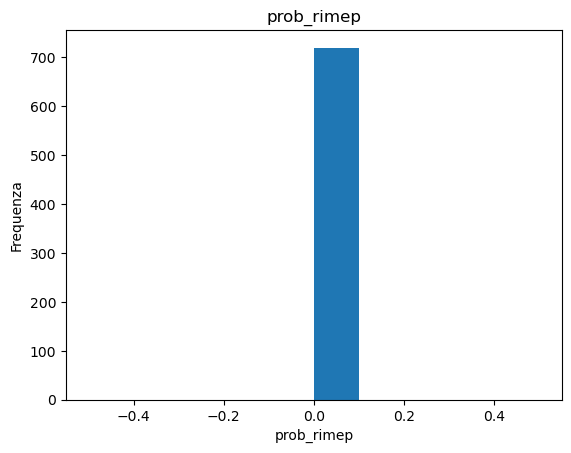

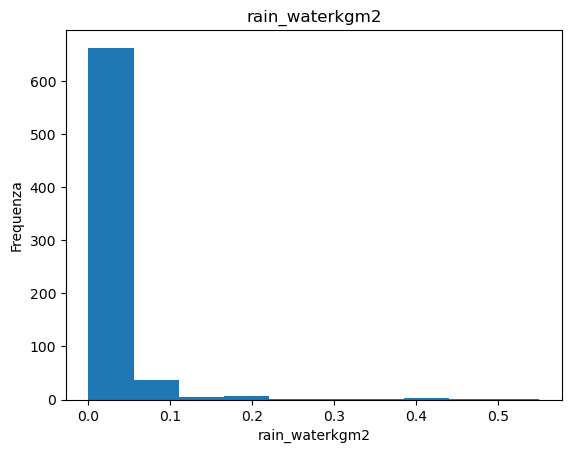

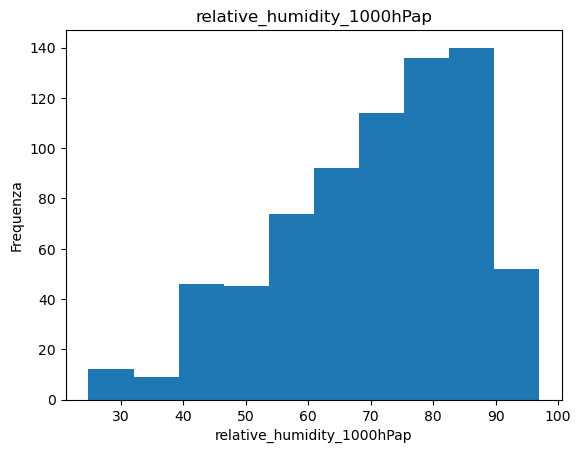

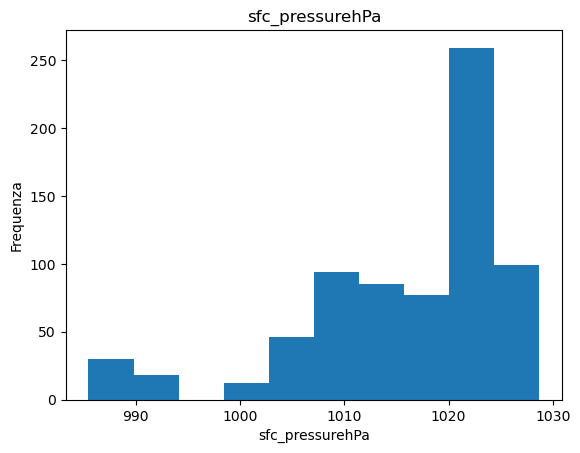

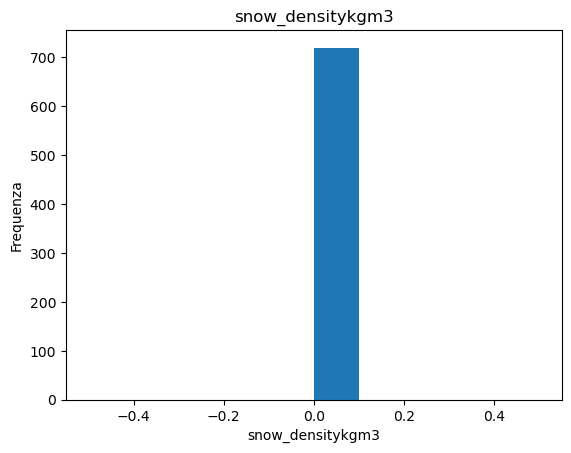

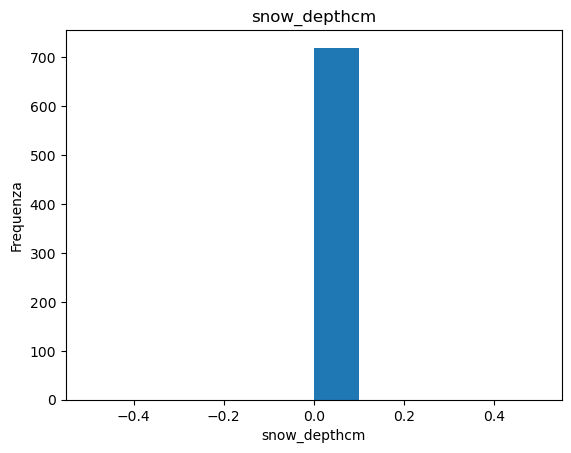

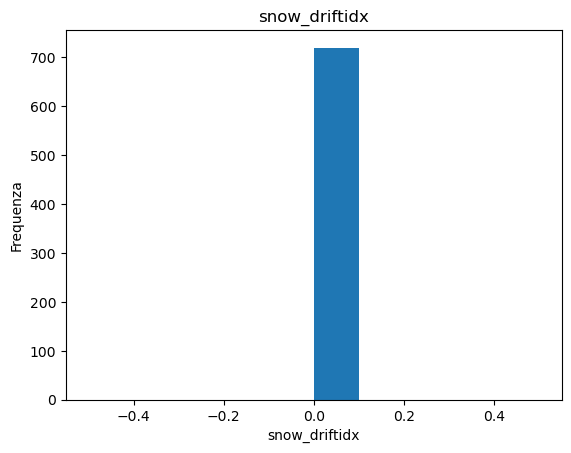

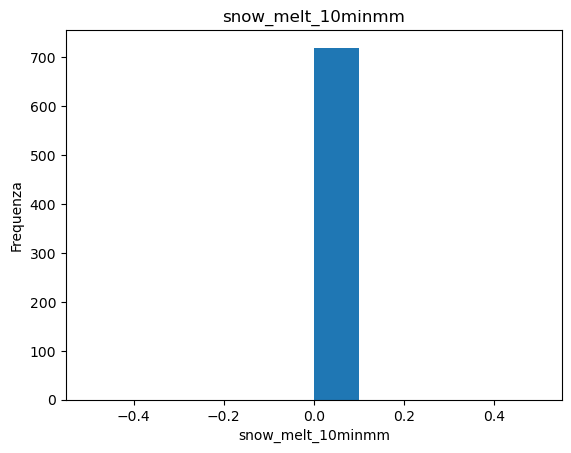

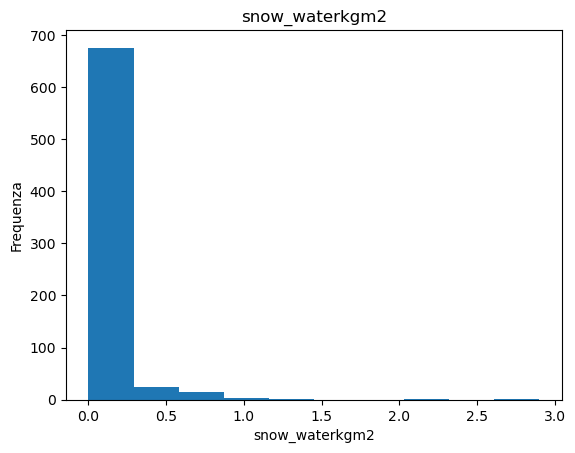

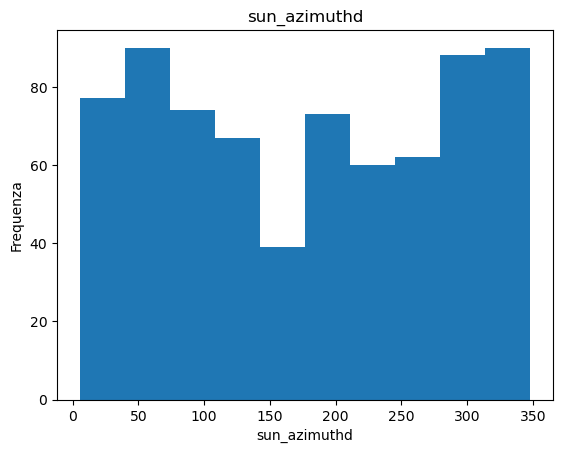

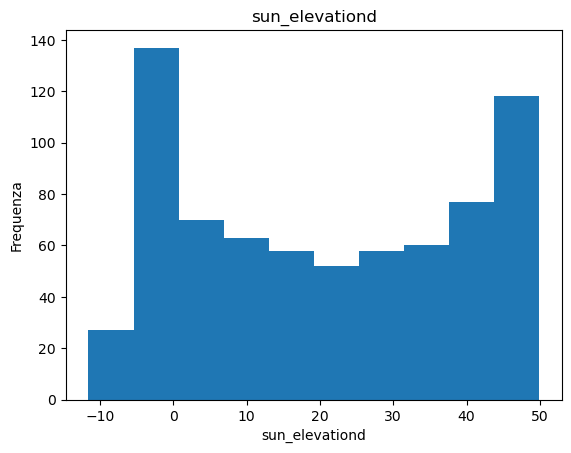

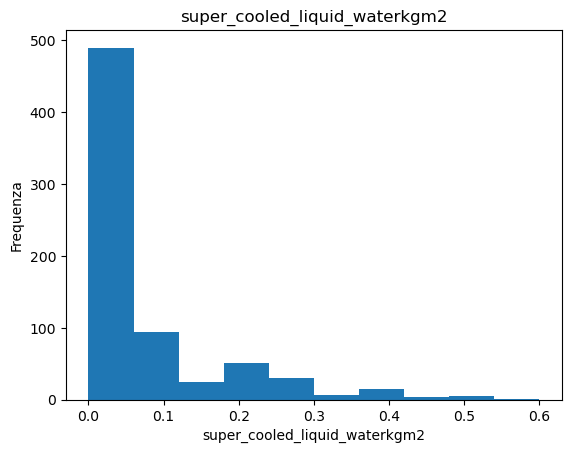

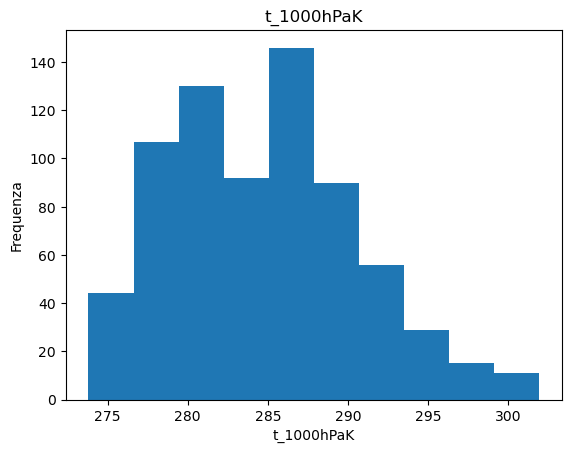

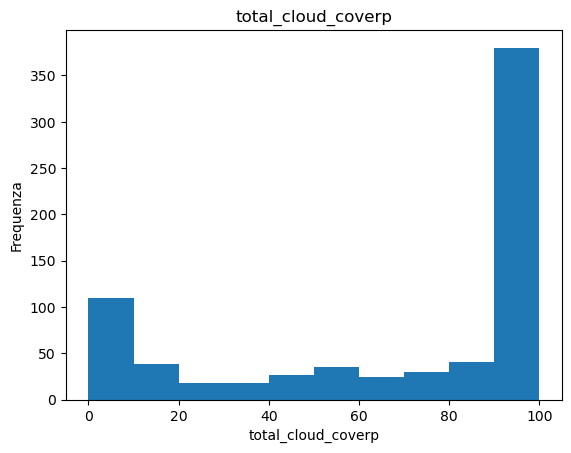

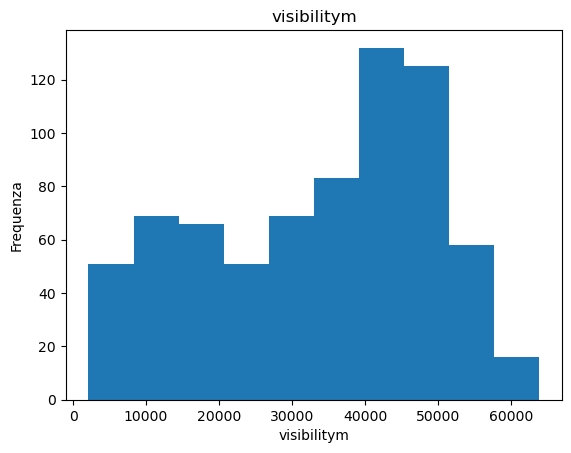

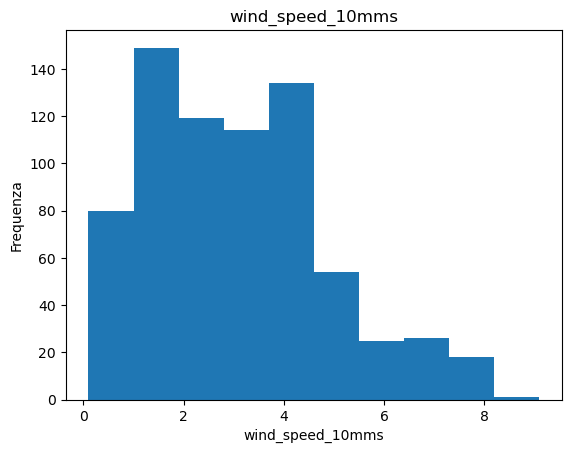

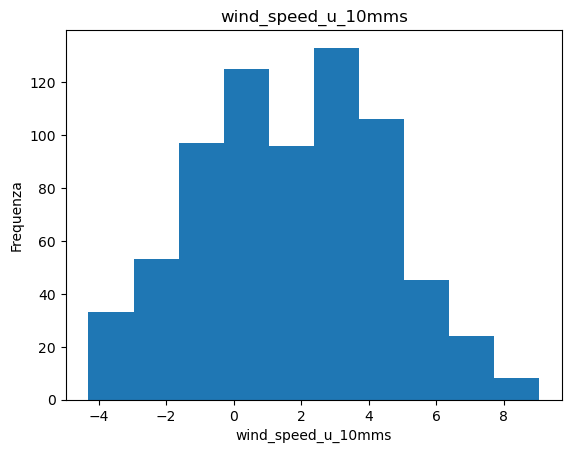

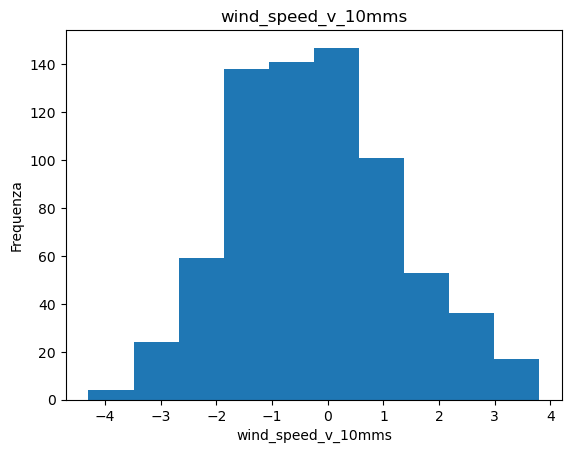

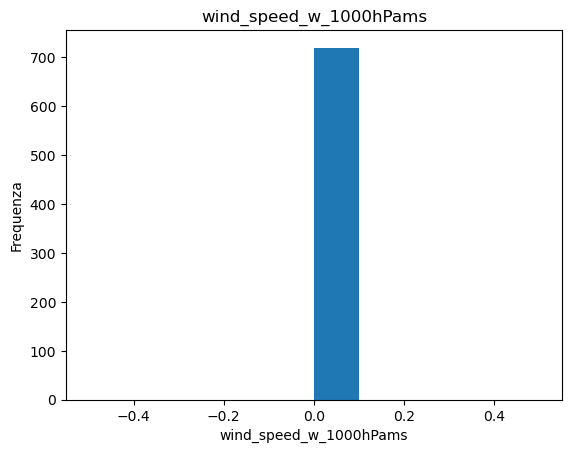

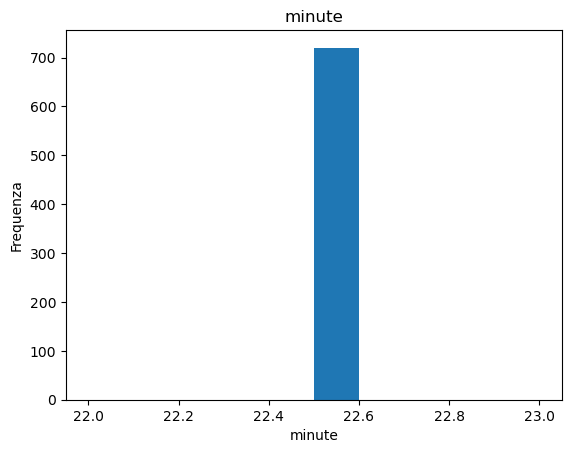

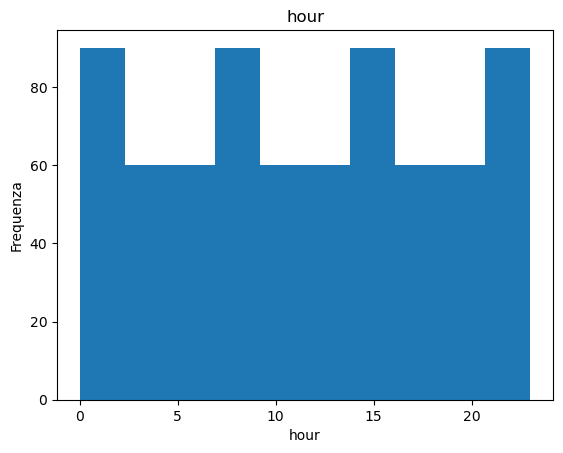

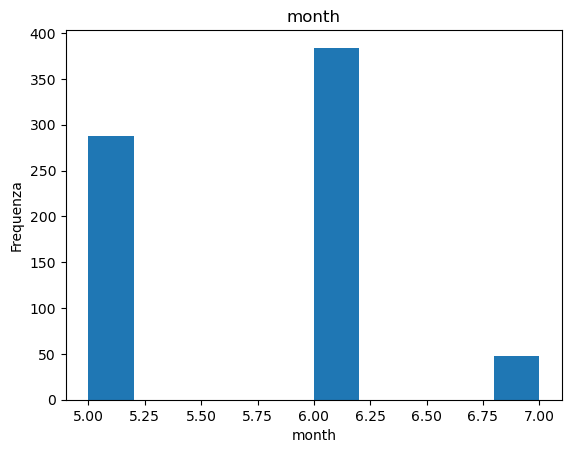

In [98]:
for column in test.columns:
    plt.figure()
    test[column].plot(kind='hist', bins=10, title=column)
    plt.xlabel(column)
    plt.ylabel('Frequenza')
    plt.show()

In [20]:
def transform(df):
    for col in df.columns:
        if col == 'pv_measurement':
            df['pv_measurement'] = np.sqrt(df['pv_measurement'])
            continue
        new_col_name = col + "_sqrt"
        df[new_col_name] = np.sqrt(df[col])

    return df

In [21]:
train = transform(train)
test = transform(test)

C:\Users\claxl\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\claxl\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\claxl\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\claxl\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\claxl\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\claxl\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sq

In [22]:
train.shape,test.shape

((10592, 99), (720, 96))

In [23]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [24]:
train['hours'] = train.index.hour
train['day'] = train.index.day
train['month'] = train.index.month
train['year'] = train.index.year
train['dayofyear'] = train.index.dayofyear

In [25]:
test['hours'] = test.index.hour
test['day'] = test.index.day
test['month'] = test.index.month
test['year'] = test.index.year
test['dayofyear'] = test.index.dayofyear

In [26]:
train = train.fillna(0)
test = test.fillna(0)

In [27]:
# Supponiamo che "gruppi" sia il risultato della suddivisione
gruppi = train.groupby('is_est')

# Itera attraverso i gruppi e crea un DataFrame separato per ciascun gruppo
dataframes_per_gruppo = {}
for valore, gruppo in gruppi:
    dataframes_per_gruppo[valore] = gruppo.copy()
train_set = dataframes_per_gruppo[0]
val_set = dataframes_per_gruppo[1]

In [28]:
train = train.drop(columns = ['is_est','is_est_sqrt'])

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [30]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'n_jobs' : [-1]
             }
print(param_grid)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['log2', 'sqrt', None], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False], 'n_jobs': [-1]}


In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf_Model = RandomForestRegressor()

y_train = train['pv_measurement']
X_train = train.drop(columns = 'pv_measurement')
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300],
                                        'n_jobs': [-1]},
                   verbose=2)

In [40]:
model_A = RandomForestRegressor(**rf_RandomGrid.best_params_)

In [41]:
X_train = train.drop(columns = 'pv_measurement')
y_train = train['pv_measurement']

In [43]:
model_A.fit(X_train,y_train)
y_pred_A = model_A.predict(test.drop(columns = 'date_forecast'))

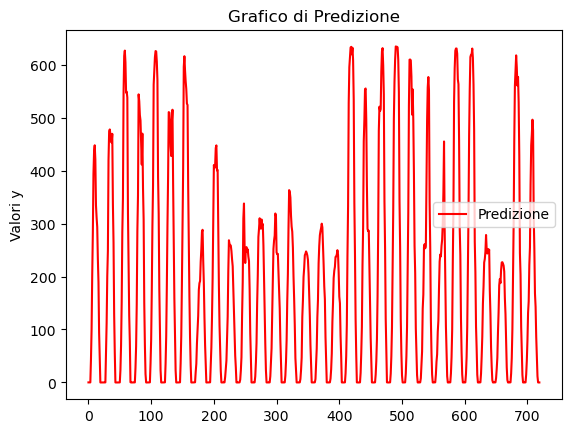

In [44]:
plt.plot(range(len(y_pred_A)), (y_pred_A)**2, label='Predizione', color='red', linestyle='-')
# Aggiungi una legenda
plt.legend()

# Aggiungi etichette agli assi
plt.ylabel('Valori y')

# Titolo del grafico
plt.title('Grafico di Predizione')

# Mostra il grafico
plt.show()

In [45]:
df = pd.DataFrame({'Prediction':y_pred_A**2})

In [46]:
test = test.reset_index()
df.loc[test['is_in_shadowidx'] == 1, 'Prediction'] = 0


In [49]:
df.to_csv('C1.csv')

In [48]:
df

,Prediction
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,43.152953
...,...
715,47.918752
716,11.824081
717,0.000000
718,0.000000
